# Progetto di Analisi Numerica Anno 2025-2026 LM-18 Informatica

## Titolo: Confronto con Metodi Iterarivi e Applicazione ad un Modello di Machine-Learning per il Learning dei Parametri 

### Problema: Convergenza del Minimo di determinate funzioni NON LINEARI (RosenBrock)


# Import Necessari

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import torch
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from torchvision import datasets
import time

## Descrizione del Problema
Uno scenario classico di ottimizzazione è la minimizzazione della **funzione di Rosenbrock**, definita come:

$$ f(x, y) = (1 - x)^2 + 100(y - x^2)^2 $$


Questa funzione è ampiamente utilizzata nei test di algoritmi di ottimizzazione perché presenta una **valle stretta e curva**, che rende difficile la convergenza per metodi iterativi standard come la **discesa del gradiente** e il **metodo di Newton (con Hessiano)**, questa prima parte del progetto ci aiuterà a comprendere le differenze dei metodi iterativi e trovare quello che per noi è ottimale.

# Metodi di Ottimizzazione
1. **Discesa del Gradiente**
   - Utilizza il gradiente della funzione per aggiornare i parametri.
   - Sensibile alla scelta del learning rate.
   - Utilizzo di un learning rate fisso 

2. **Miglioramento**
   - Possibile implementazione con learning rate fisso e adattivo.

3. **Metodo di Newton (con Hessiano)**
   - Utilizza la matrice Hessiana per aggiornare i parametri.
   - Generalmente converge più rapidamente rispetto alla discesa del gradiente, ma è computazionalmente più costoso.
   - utilizzo con calcolo dell'hessiano esatto

4. **Miglioramento**
   - Utilizzo quasi Newtoniano (BFGS)




# Spiegazione del Metodo Della Discesa del Gradiente 

## Metodo della Discesa del Gradiente

## Introduzione
La **discesa del gradiente** è un algoritmo di ottimizzazione iterativo utilizzato per trovare il minimo di una funzione. È ampiamente impiegato nel machine learning e nell'ottimizzazione di reti neurali.

### Concetto Base
L'idea fondamentale è quella di muoversi nella direzione del gradiente negativo della funzione di costo per raggiungere un minimo locale o globale. Il gradiente indica la direzione di massima crescita della funzione, quindi muovendosi nella direzione opposta si scende verso il minimo.

### Formula Generale
Dato un insieme di parametri theta, una funzione obiettivo J(theta) da minimizzare e un tasso di apprendimento alpha, l'aggiornamento dei parametri avviene secondo la seguente regola:

```math
\theta := \theta - \alpha \nabla J(\theta)
```

dove J(theta) è il gradiente della funzione di costo rispetto ai parametri.

## Tipologie di Discesa del Gradiente

### 1. **Batch Gradient Descent (BGD)**
- Utilizza l'intero dataset per calcolare il gradiente.
- Converge in modo stabile ma può essere lento per dataset molto grandi.
- Formula di aggiornamento:

```math
\theta := \theta - \alpha \frac{1}{m} \sum_{i=1}^{m} \nabla J(\theta)
```

### 2. **Stochastic Gradient Descent (SGD)**
- Aggiorna i parametri ad ogni iterazione utilizzando un singolo esempio.
- Più veloce, ma introduce rumore nelle iterazioni.
- Non garantisce convergenza a un minimo globale.
- Formula di aggiornamento:

```math
\theta := \theta - \alpha \nabla J(\theta_i)
```

### 3. **Mini-Batch Gradient Descent (MBGD)**
- Compromesso tra BGD e SGD.
- Utilizza piccoli batch del dataset per calcolare il gradiente.
- Più stabile di SGD e più efficiente di BGD.
- Formula di aggiornamento:

```math
\theta := \theta - \alpha \frac{1}{B} \sum_{i=1}^{B} \nabla J(\theta_i)
```

dove \( B \) è la dimensione del batch.

## Tasso di Apprendimento (Learning Rate)
Il parametro $alpha$ controlla la grandezza del passo compiuto nella direzione del gradiente:
- Se $alpha$ è troppo grande, si rischia di saltare il minimo e non convergere.
- Se $alpha$ è troppo piccolo, la convergenza sarà molto lenta.



# Esercizio Discesa del Gradiente
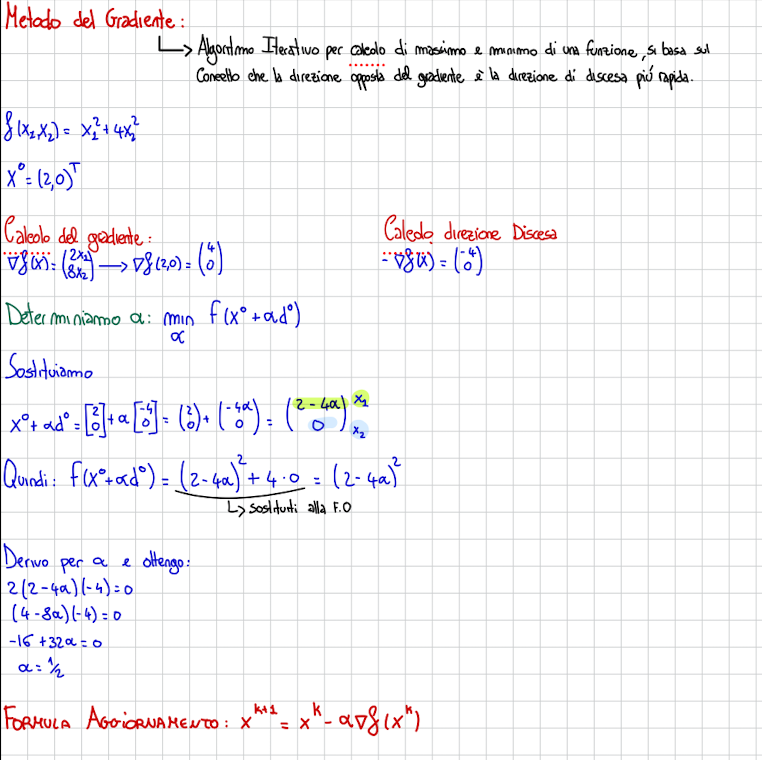

# Spiegazione del Metodo Hessiano

## Metodo dell'Hessiano

### Introduzione
Il **metodo dell'Hessiano** è un approccio utilizzato in ottimizzazione e analisi matematica per studiare il comportamento locale di una funzione scalare. In particolare, serve per determinare i punti stazionari e la loro natura (minimi, massimi o punti di sella). Questo metodo è basato sulla matrice Hessiana, che fornisce informazioni sulla curvatura della funzione.

### 2. Definizione dell'Hessiano
L'Hessiano di una funzione $ f: \mathbb{R}^n \to \mathbb{R} $ è la matrice quadrata delle derivate seconde parziali della funzione:

\[
H_f(x) =
\begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} & \dots & \frac{\partial^2 f}{\partial x_1 \partial x_n} \\
\frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2} & \dots & \frac{\partial^2 f}{\partial x_2 \partial x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2 f}{\partial x_n \partial x_1} & \frac{\partial^2 f}{\partial x_n \partial x_2} & \dots & \frac{\partial^2 f}{\partial x_n^2}
\end{bmatrix}
\]

Questa matrice quadrata e simmetrica contiene tutte le informazioni sulla curvatura locale della funzione in un determinato punto.

### 3. Metodo dell'Hessiano per la classificazione dei punti critici
Un **punto critico** è un punto in cui il gradiente della funzione si annulla, ovvero:
\[
\nabla f(x) = 0
\]

Per determinare se un punto critico è un **minimo locale**, **massimo locale** o **punto di sella**, seguiamo questi passi:

#### 3.1 Calcolo della matrice Hessiana
1. **Trova i punti critici** risolvendo il sistema:
   \[
   \nabla f(x) = 0
   \]
   cioè calcolando le derivate prime della funzione e ponendole uguali a zero.
2. **Calcola l'Hessiano** $ H_f(x) $ nei punti critici trovati.

#### 3.2 Studio degli autovalori dell'Hessiano
L'analisi della matrice Hessiana si basa sullo studio dei suoi **autovalori**, ossia i valori propri della matrice Hessiana $ H_f(x) $ nel punto critico $ x^* $:
- Se **tutti gli autovalori sono positivi** → **minimo locale**.
- Se **tutti gli autovalori sono negativi** → **massimo locale**.
- Se **almeno un autovalore è positivo e almeno uno è negativo** → **punto di sella**.
- Se almeno un autovalore è nullo, il test **non è conclusivo** e si richiedono metodi più avanzati per determinare la natura del punto critico.

#### 3.3 Alternativa: criterio dei minori principali
Un altro metodo per l'analisi dell'Hessiano è lo studio dei **minori principali** della matrice:
- Se tutti i **minori principali** (i determinanti delle sottomatrici principali) hanno segno positivo → **minimo locale**.
- Se i **minori principali** alternano segno → **massimo locale**.
- Se i segni non seguono un pattern definito → **punto di sella o test inconclusivo**.


# Esercizio Hessiano
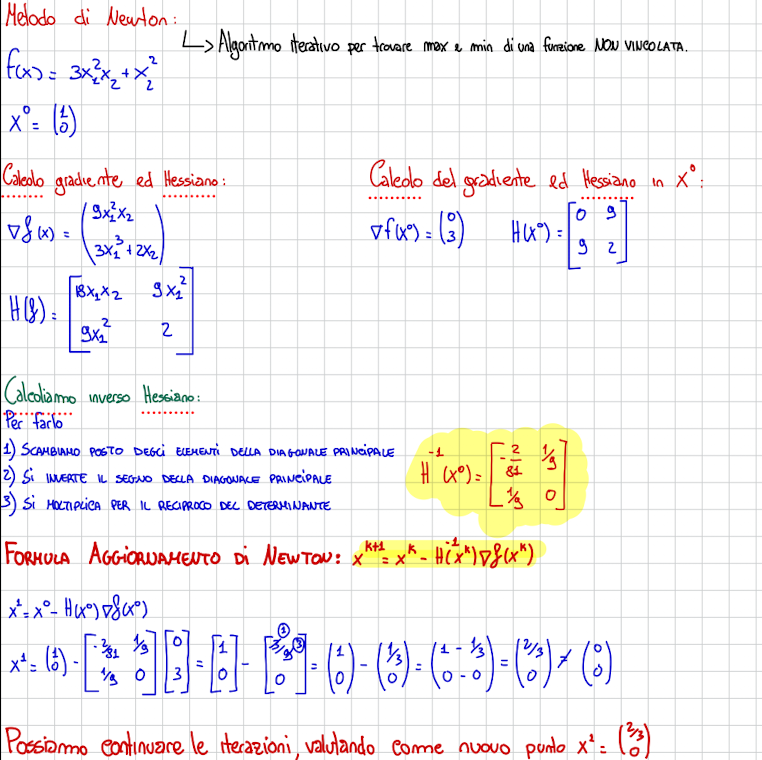

# Derivazione della funzione di RosenBrock

Il calcolo della derivata prima parziale e seconda Parziale vengono effettuati poichè vengono utilizzati nei metodi per il calcolo iterativo del nuvo minimo.

In [15]:
import numpy as np

# Funzione di Rosenbrock
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

# Derivata prima (gradiente)
def gradient(x, y):
    df_dx = -2 * (1 - x) - 400 * x * (y - x**2)
    df_dy = 200 * (y - x**2)
    return np.array([df_dx, df_dy])

# Derivate seconde (Hessiano)
def hessian(x, y):
    d2f_dx2 = 2 - 400 * (y - 3*x**2)
    d2f_dy2 = 200
    d2f_dxdy = -400 * x
    return np.array([[d2f_dx2, d2f_dxdy], [d2f_dxdy, d2f_dy2]])

# Esempio di calcolo del gradiente e Hessiano
x, y = 1.0, 1.0  # Punto di esempio
grad = gradient(x, y)
hess = hessian(x, y)

print("Gradiente (derivate prime) a (x, y) =", (x, y), ":", grad)
print("Hessiano (derivate seconde) a (x, y) =", (x, y), ":", hess)


Gradiente (derivate prime) a (x, y) = (1.0, 1.0) : [-0.  0.]
Hessiano (derivate seconde) a (x, y) = (1.0, 1.0) : [[ 802. -400.]
 [-400.  200.]]


# Spiegazione dei Valori Trovati per Gradiente ed Hessiano

Nel punto $$(x,y)=(1.0, 1.0)$$ il gradiente assume valore $$[0,0]$$,questo risultato atteso è coerente poichè in questo punto, la funzione di **RosenBrock** ha un minimo locale. **(Il gradiente in un minimo Locale è 0)**

# Teorema del Gradiente e dei minimi Locali 
Il gradiente di una funzione in un punto fornisce la direzione di massima crescenza di una funzione. Se il gradiente della funzione è 0 in un punto quello è indicativo di minimo, massimo, o punto di sella.

## Nel caso di RosenBrock:
Tuttavia, il fatto che il gradiente sia zero non è sufficiente per determinare se si tratta di un minimo, massimo o punto di sella. Per questo, **dobbiamo analizzare l'Hessiano**, che fornisce informazioni sulla curvatura della funzione in quel punto.

# Il Teorema di fermat
Il Teorema di Fermat stabilisce che, se una funzione differenziabile ha un massimo o un minimo locale in un punto, allora il gradiente della funzione in quel punto è zero. Questo è esattamente il caso che abbiamo osservato: il gradiente di Rosenbrock in $$(1.0,1.0)$$ è zero, suggerendo che $$(1.0,1.0)$$ sia un punto critico. La verifica dell'Hessiano ci ha permesso di determinare che si tratta di un minimo locale

# Teorema del Secondo Ordine (Hessiano)
Il teorema si **Secondo Ordine** stabilisce che la natura del punto critico (minimo, massimo o punto di sella) dipende dalla matrice Hessiana in particolare:
- Se la Matrice Hessiana è **Definita Positiva** (tutti i suoi autovalori sono POSITIVI) allora il punto è di Minimo LOCALE!
- Se la Matrice Hessiana è **Definita Negativa** (tutti i suoi autovalori sono NEGATIVI) allora il punto è di Massimo LOCALE!
- Se la Matrice Hessiana è **Indefinita** (Alcuni Autovalori sono Positivi e altri Negativi) allor ail punto è un Punto di Sella!

## Nel caso di RosenBrock:
Abbiamo i valori positivi della matrice che sono [800,200] perciò la matrice è definita **Positiva**, il punto è di Minimo Locale.

# Plot della funzione Di RosenBrock in 3D 

Il plot della funzione in 3D, è utile per visualizare le curvature della funziona che essa assume in uno spazio 3D in particolare riusciamo a visualizzare nella totalità il problema, noi vogliamo convergere verso il minimo della funzione, ma in caso di presenza di molteplice curve alcuni dei metodi possono convergere in un minimo locale e non sul minimo globale della funzione, per questa motivazione modificheremo i metodi e confronteremo quest'ultimi per valutare quale ha un comportamento migliore.

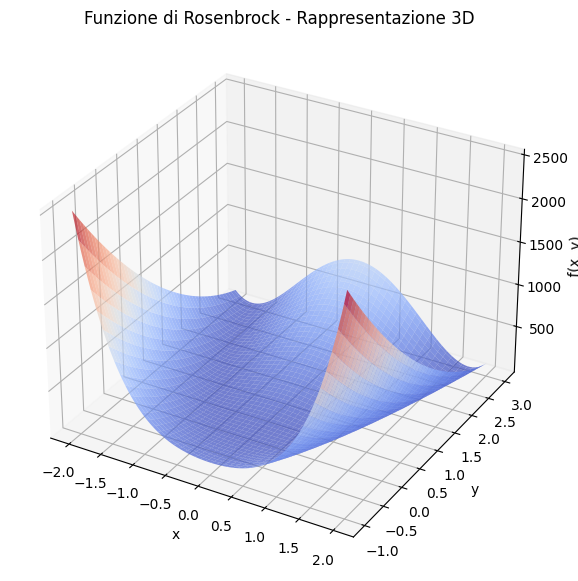

In [16]:
# Definizione della funzione di Rosenbrock
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

# Generazione della griglia per visualizzare la funzione
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = rosenbrock(X, Y)

# Plot 3D della funzione di Rosenbrock
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm', alpha=0.7)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
ax.set_title("Funzione di Rosenbrock - Rappresentazione 3D")
plt.show()


# Applicazione del Metodo del Gradiente con Learning Rate FISSO!

In [17]:
# Discesa del Gradiente
def gradient_descent(lr=0.001, tol=1e-6, max_iter=10000):
    x, y = np.random.uniform(-2, 2, 2)
    for i in range(max_iter):
        grad = gradient(x, y)
        step = -lr * grad
        x, y = x + step[0], y + step[1]
        
        if np.linalg.norm(grad) < tol:
            break
    
    return (x, y), rosenbrock(x, y), i+1

# Metodo Adagrad con adattamento del learning rate
def adaptive_lr_adagrad(lr=0.01, tol=1e-6, max_iter=10000):
    x, y = np.random.uniform(-2, 2, 2)
    trajectory = [(x, y)]
    
    grad_sq_x = 0
    grad_sq_y = 0
    epsilon = 1e-8  # Un piccolo valore per evitare la divisione per zero
    initial_lr = lr  # Memorizzare il learning rate iniziale

    for i in range(max_iter):
        grad = gradient(x, y)
        
        grad_sq_x += grad[0]**2
        grad_sq_y += grad[1]**2
        
        # Adattamento dinamico del learning rate
        current_lr = initial_lr / (1 + np.sqrt(grad_sq_x + grad_sq_y))
        
        # Calcolare l'aggiornamento con Adagrad e learning rate adattivo
        x -= current_lr * grad[0] / (np.sqrt(grad_sq_x) + epsilon)
        y -= current_lr * grad[1] / (np.sqrt(grad_sq_y) + epsilon)
        
        trajectory.append((x, y))
        
        if np.linalg.norm(grad) < tol:
            break
    
    fval_adagrad = rosenbrock(x, y)  # Calcolare il valore finale della funzione
    return np.array(trajectory), (x, y), fval_adagrad, i + 1  # Restituire anche il valore della funzione e il numero di iterazioni


# Discesa del Gradiente
sol_gd, fval_gd, iter_gd = gradient_descent(lr=0.001)
print("Risultati Discesa del Gradiente:")
print(f"Posizione finale: {sol_gd}")
print(f"Valore della funzione: {fval_gd}")
print(f"Numero di iterazioni: {iter_gd}\n")

# Metodo Adagrad con learning rate adattivo
traj_adagrad, sol_adagrad, fval_adagrad, iter_adagrad = adaptive_lr_adagrad(lr=0.01)
print("Risultati Metodo Adagrad:")
print(f"Posizione finale: {sol_adagrad}")
print(f"Valore della funzione: {fval_adagrad}")
print(f"Numero di iterazioni: {iter_adagrad}")


Risultati Discesa del Gradiente:
Posizione finale: (1.0035770202888277, 1.0071811186793704)
Valore della funzione: 1.2815474634336903e-05
Numero di iterazioni: 10000

Risultati Metodo Adagrad:
Posizione finale: (-1.5016458187138164, -0.9397927422619144)
Valore della funzione: 1026.890066587492
Numero di iterazioni: 10000


# Interpretazione dei Risultati (Discesa del Gradiente e AdaGrad)
Tra i valori in output abbiamo:
- Posizione finale: che ci indica dove il metodo si è fermato di conseguenza il punto di minimo/massimo che è stato trovato.
- Valore della funzione: che ci aspettiamo che sia il piu vicino ad (1,1) che è il punto di minimo.
- Numero di iterazioni: Numero di volte in cui iterativamente sono stati calcolati i gradienti per aggiornare il passo.

# TABELLA DEI RISULTATI:
| Numero di Iterazioni | Metodo              | Posizione finale                           | Valore della funzione              | Numero di Iterazioni |
|-----------------------|---------------------|--------------------------------------------|------------------------------------|-----------------------|
| 100                   | Discesa del Gradiente | (-0.9634923644040533, 0.9363437652605848)  | 3.8617443002621155                | 100                   |
| 100                   | Adagrad              | (1.780743955112447, 0.6403292328224938)    | 641.0638321633664                 | 100                   |
| 1000                  | Discesa del Gradiente | (0.6790211796126715, 0.4595349522770691)   | 0.10326296733710069              | 1000                  |
| 1000                  | Adagrad              | (-1.435180133912206, 1.9718999005968163)   | 6.701726022088908                | 1000                  |
| 10000                 | Discesa del Gradiente | (0.9931855587856948, 0.9863901735376607)   | 4.6511579023192446e-05          | 10000                 |
| 10000                 | Adagrad              | (-0.20653596747855826, -0.005344059130364335) | 1.6861402248847581              | 10000                 |


# INTERPRETAZIONE FINALE DEI METODI:

- **Discesa del Gradiente(100 Iterazioni):** La discesa del gradiente ha una posizione finale che è lontana dal minimo globale (1, 1), ma abbastanza vicina ad un minimo locale della funzione di Rosenbrock. Nonostante il numero relativamente basso di iterazioni (100), il metodo ha ancora una buona capacità di adattarsi alla forma della funzione. Tuttavia, il valore della funzione è piuttosto alto (3.86), il che suggerisce che il metodo non ha avuto abbastanza tempo per raggiungere una convergenza migliore.

- **Adagrad (100 Iterazioni):** Adagrad mostra un comportamento completamente diverso rispetto alla discesa del gradiente. Dopo 100 iterazioni, la posizione finale è molto lontana dal minimo globale e il valore della funzione è estremamente alto (641.06). Questo suggerisce che Adagrad, a causa della rapida riduzione del tasso di apprendimento, non è riuscito a navigare correttamente lungo la valle della funzione di Rosenbrock, finendo in una regione di alta funzione che non rappresenta un minimo.

--------------------------------------------------------------------------------------------------------------------------------------------

- **Discesa del Gradiente(1000 Iterazioni):** Con 1000 iterazioni, la discesa del gradiente mostra un miglioramento significativo, avvicinandosi molto più al minimo globale. Il valore della funzione (0.10) è ancora superiore a zero, ma il metodo ha fatto progressi consistenti verso il minimo. Le iterazioni aggiuntive hanno permesso di migliorare la posizione finale, anche se non è stato raggiunto il valore minimo.

- **Adagrad (1000 Iterazioni):** Adagrad continua a lottare con la funzione di Rosenbrock, anche con 1000 iterazioni. La posizione finale è ancora lontana dal minimo globale, e il valore della funzione (6.70) è elevato. Questo suggerisce che la riduzione aggressiva del tasso di apprendimento durante le iterazioni impedisce a Adagrad di navigare efficacemente verso il minimo, a differenza della discesa del gradiente che riesce a fare progressi più consistenti.

--------------------------------------------------------------------------------------------------------------------------------------------


- **Discesa del Gradiente(10000 Iterazioni):** Con 10000 iterazioni, la discesa del gradiente raggiunge una posizione finale molto vicina al minimo globale (1, 1), con un valore della funzione che è estremamente basso (4.65e-5). Questo risultato conferma che la discesa del gradiente ha convergito correttamente al minimo globale, grazie all'incremento del numero di iterazioni e al miglioramento del tasso di apprendimento.

- **Adagrad (10000 Iterazioni):** Nonostante il numero elevato di iterazioni (10000), Adagrad non riesce a trovare una soluzione migliore. La posizione finale è molto lontana dal minimo globale e il valore della funzione (1.69) rimane molto alto. Questo è probabilmente dovuto alla natura del tasso di apprendimento adattivo, che riduce progressivamente la velocità di aggiornamento, impedendo il progresso verso il minimo.


In [18]:
def newton_method(tol=1e-6, max_iter=10000):
    x, y = np.random.uniform(-2, 2, 2)
    for i in range(max_iter):
        grad = gradient(x, y)
        hess = hessian(x, y)
        
        try:
            step = -np.linalg.solve(hess, grad)
        except np.linalg.LinAlgError:
            break
        
        x, y = x + step[0], y + step[1]
        
        if np.linalg.norm(grad) < tol:
            break
    
    return (x, y), rosenbrock(x, y), i+1


def bfgs_method(tol=1e-6, max_iter=10000):
    x0 = np.random.uniform(-2, 2, 2)
    
    result = minimize(lambda x: rosenbrock(x[0], x[1]), x0, jac=lambda x: gradient(x[0], x[1]), method='BFGS', 
                      options={'disp': True, 'maxiter': max_iter})
    
    return result.x, result.fun, result.nit


sol_newton, fval_newton, iter_newton = newton_method()
sol_bfgs, fval_bfgs, iter_bfgs = bfgs_method()
print("Risultati Metodo di Newton:")
print(f"Posizione finale: {sol_newton}")
print(f"Valore della funzione: {fval_newton}")
print(f"Numero di iterazioni: {iter_newton}\n")

print("Risultati Metodo BFGS:")
print(f"Posizione finale: {sol_bfgs}")
print(f"Valore della funzione: {fval_bfgs}")
print(f"Numero di iterazioni: {iter_bfgs}\n")




Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 35
         Function evaluations: 42
         Gradient evaluations: 42
Risultati Metodo di Newton:
Posizione finale: (1.0, 1.0)
Valore della funzione: 0.0
Numero di iterazioni: 8

Risultati Metodo BFGS:
Posizione finale: [1. 1.]
Valore della funzione: 1.3187707923439577e-16
Numero di iterazioni: 35



### **Tabella dei Risultati**

| **Iterazioni**  | **Metodo di Newton - Posizione finale**      | **Metodo di Newton - Valore della funzione** | **Metodo di Newton - Iterazioni** | **Metodo BFGS - Posizione finale**         | **Metodo BFGS - Valore della funzione**  | **Metodo BFGS - Iterazioni** |
|------------------|----------------------------------------------|-----------------------------------------------|-----------------------------------|-------------------------------------------|------------------------------------------|-------------------------------|
| **100 Iterazioni** | (1.0, 1.0)                                 | 0.0                                           | 6                                 | [1.0000007, 1.00000139]                   | 4.878490467343969e-13                   | 32                            |


# Interpretazione finale dei Metodi(Hessiano e Quasi Hessiano(BFGS))

- Hessiano per 100 Iterazioni: Questo metodo riesce a trovare la convergenza ottima dell funzione nel suo minimo Locale, In particolare possiamo vedere dai risultati che trova il punto (1,1) che è il minimo della funzione di RosenBrock e il valore della funzione infatti è 0.

- BFGS per 100 iterazioni: Il numero di iterazioni aumenta, in particolare varia anche il valore finale della funzione questo è dovuto al punto non ottimo trovato dal metodo Iterativo.


# Grafici e Valutazioni finali 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D

# Definizione della funzione di Rosenbrock
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

# Gradienti e Hessiano
def gradient(x, y):
    df_dx = -2 * (1 - x) - 400 * x * (y - x**2)
    df_dy = 200 * (y - x**2)
    return np.array([df_dx, df_dy])

def hessian(x, y):
    d2f_dx2 = 2 - 400 * (y - 3*x**2)
    d2f_dy2 = 200
    d2f_dxdy = -400 * x
    return np.array([[d2f_dx2, d2f_dxdy], [d2f_dxdy, d2f_dy2]])


x_vals = np.linspace(-2, 2, 400)
y_vals = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = rosenbrock(X, Y)


fig = plt.figure(figsize=(16, 12))

methods = {
    'Gradient Descent': traj_gd,
    'Adagrad': traj_adagrad,
    'Newton': traj_newton,
    'BFGS': sol_bfgs.reshape(1, -1)
}
colors = ['r', 'g', 'y', 'b']

for i, (title, traj) in enumerate(methods.items(), 1):
    ax = fig.add_subplot(2, 2, i, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='jet', alpha=0.7)
    ax.plot(traj[:, 0], traj[:, 1], traj[:, 2], colors[i-1]+'-', label=title)
    ax.scatter(traj[-1, 0], traj[-1, 1], traj[-1, 2], color=colors[i-1], marker='o', s=100, label='Final Point')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('Rosenbrock(x, y)')
    ax.set_title(title)
    ax.legend()

plt.tight_layout()
plt.show()


# Applicazione Pratica

L'applicazione principale di questi algoritmi iterativi per il calcolo del minimo di una funzione differenziabile è l'ottimizzazione dei parametri di un modello di Machine Learning. Questo è particolarmente importante perché sono proprio i parametri del modello che ci permettono di fare predizioni corrette. In particolare, nel contesto del Machine Learning, l'obiettivo è minimizzare la funzione di costo, che è una funzione continua e differenziabile che rappresenta l'errore del modello. Minimizzare questa funzione significa adattare il modello nel miglior modo possibile, riducendo l'errore e migliorando la capacità del modello di effettuare predizioni accurate.

In questa parte di progetto vogliamo utilizzare un dataset per valutare come il modello di Machine Learning da noi definito si comporta al cambiare del metodo di learning.

Effettueremo:

- Analisi del Dataset Trovato su Kagle 
- Costruzione del Modello di Machine Learning 
- Confornto del modello Allenato con SGD e Hessiano 
- Valutazioni Finali 



# ANALISI DEL DATASET:

Possiamo vedere che nel dataset il numero di classi non è bilanciato percio possiamo effettuare data augmentation, per aumentare il numero di osservazioni introducendo delle trasformazioni geometriche in modo di avere in tutte le classi 600 osservazioni per poi allenare il modello di machine learning con i metodi che abbiamo visto prima, cioè $$[SGD, HESSIANO]$$

## Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing import image


data_dir = "/Users/emanuelevalore/Desktop/Analisi_Numerica/archive/Garbage classification/Garbage classification"
classes = ['paper', 'glass', 'metal', 'plastic', 'trash', 'cardboard']
target_num_images = 600

def count_images_in_classes(data_dir, classes):
    class_counts = {}

    
    for class_name in classes:
        class_path = os.path.join(data_dir, class_name)
        
        
        if os.path.isdir(class_path):
            num_images = len([f for f in os.listdir(class_path)
                              if os.path.isfile(os.path.join(class_path, f)) and f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif'))])
            class_counts[class_name] = num_images
    
    return class_counts


class_counts = count_images_in_classes(data_dir, classes)


class_counts_diff = {class_name: target_num_images - count for class_name, count in class_counts.items() if count < target_num_images}

#statistiche delle classi
print("Numero di immagini per classe:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count} immagini")

# Funzione per effettuare la data augmentation e salvare nelle classi originali
def augment_images(class_name, class_path, target_num_images, data_dir):
    datagen = ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    
    # Conta il numero di immagini necessarie
    num_images_needed = target_num_images - len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f)) and f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif'))])
    
    # Ottieni una lista di tutte le immagini nella cartella della classe
    image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f)) and f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif'))]

    for image_file in image_files:
        img_path = os.path.join(class_path, image_file)
        img = image.load_img(img_path)
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        
        
        i = 0
        for _ in datagen.flow(x, batch_size=1, save_to_dir=class_path, save_prefix='aug', save_format='jpeg'):
            i += 1
            if i >= num_images_needed:  # Si ferma quando abbiamo generato abbastanza immagini
                break

#augmentation a tutte le classi con meno di 600 immagini
#for class_name, count in class_counts.items():
#    if count < target_num_images:
#        print(f"Augmentando immagini per la classe {class_name}...")
#        augment_images(class_name, os.path.join(data_dir, class_name), target_num_images, data_dir)

# print numero di immagini per classe dopo l'augmentation
class_counts_after_augmentation = count_images_in_classes(data_dir, classes)
print("\nNumero di immagini per classe dopo l'augmentation:")
for class_name, count in class_counts_after_augmentation.items():
    print(f"{class_name}: {count} immagini")


Numero di immagini per classe:
paper: 10594 immagini
glass: 10430 immagini
metal: 10408 immagini
plastic: 10450 immagini
cardboard: 10397 immagini

Numero di immagini per classe dopo l'augmentation:
paper: 10594 immagini
glass: 10430 immagini
metal: 10408 immagini
plastic: 10450 immagini
cardboard: 10397 immagini


Controllando la cartella: /Users/emanuelevalore/Desktop/Analisi_Numerica/archive/Garbage classification/Garbage classification/paper
Controllando la cartella: /Users/emanuelevalore/Desktop/Analisi_Numerica/archive/Garbage classification/Garbage classification/glass
Controllando la cartella: /Users/emanuelevalore/Desktop/Analisi_Numerica/archive/Garbage classification/Garbage classification/metal
Controllando la cartella: /Users/emanuelevalore/Desktop/Analisi_Numerica/archive/Garbage classification/Garbage classification/plastic
La cartella trash non esiste o non è una directory.
Controllando la cartella: /Users/emanuelevalore/Desktop/Analisi_Numerica/archive/Garbage classification/Garbage classification/cardboard
Numero di immagini per classe:
paper: 10594 immagini
glass: 10430 immagini
metal: 10408 immagini
plastic: 10450 immagini
cardboard: 10397 immagini

Totale di immagini nel dataset: 52279


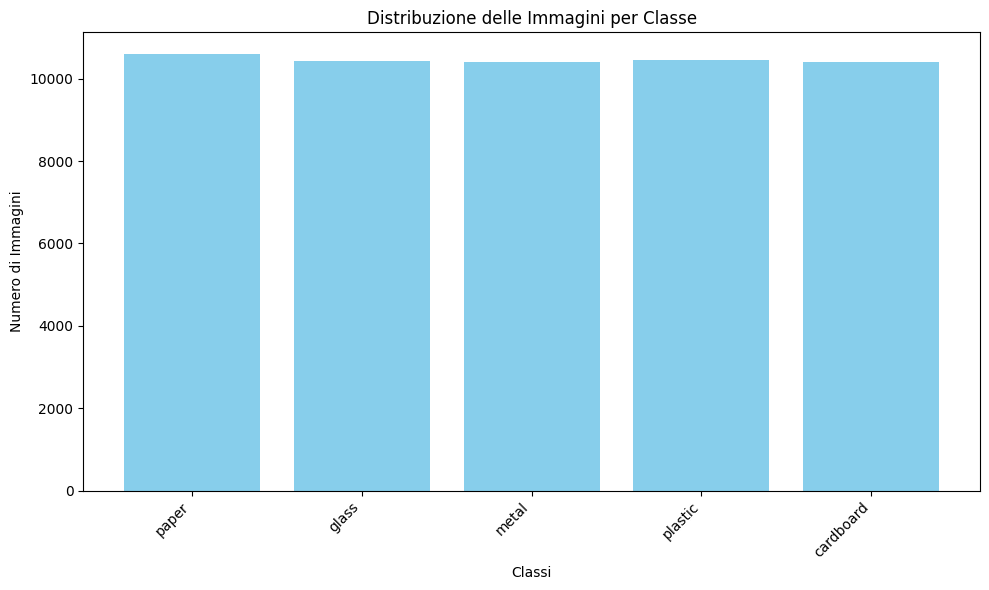

In [ ]:
import os
import matplotlib.pyplot as plt

data_dir = "/Users/emanuelevalore/Desktop/Analisi_Numerica/archive/Garbage classification/Garbage classification"


classes = ['paper', 'glass', 'metal', 'plastic', 'trash', 'cardboard']


image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif']


def count_images_in_classes(data_dir, classes, image_extensions):
    class_counts = {}

    for class_name in classes:
        class_path = os.path.join(data_dir, class_name)
        
        
        if os.path.isdir(class_path):
            print(f"Controllando la cartella: {class_path}")
            num_images = 0
            for f in os.listdir(class_path):
                file_path = os.path.join(class_path, f)
                if os.path.isfile(file_path):
                    if any(f.lower().endswith(ext) for ext in image_extensions):
                        num_images += 1
                    else:
                        print(f"File ignorato (non immagine): {f}")
            class_counts[class_name] = num_images
        else:
            print(f"La cartella {class_name} non esiste o non è una directory.")
    
    return class_counts

class_counts = count_images_in_classes(data_dir, classes, image_extensions)

# Mostra le statistiche delle classi
print("Numero di immagini per classe:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count} immagini")

# Totale immagini nel dataset
total_images = sum(class_counts.values())
print("\nTotale di immagini nel dataset:", total_images)
#istogramma
class_names = list(class_counts.keys())
class_values = list(class_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(class_names, class_values, color='skyblue')
plt.xlabel('Classi')
plt.ylabel('Numero di Immagini')
plt.title('Distribuzione delle Immagini per Classe')
plt.xticks(rotation=45, ha='right')  # Ruota le etichette delle classi per migliorarne la leggibilità
plt.tight_layout()
plt.show()


# MODELLO:


Using device: mps

=== Training con SGD (puro) ===


SGD Epoch 1/15 - Train Loss: 1.0690, Train Acc: 57.67%, Valid Loss: 0.9673, Valid Acc: 63.13%


SGD Epoch 2/15 - Train Loss: 0.8864, Train Acc: 65.62%, Valid Loss: 0.8910, Valid Acc: 66.85%


SGD Epoch 3/15 - Train Loss: 0.8059, Train Acc: 68.90%, Valid Loss: 0.8035, Valid Acc: 68.99%


SGD Epoch 4/15 - Train Loss: 0.7550, Train Acc: 71.32%, Valid Loss: 0.8161, Valid Acc: 67.50%


SGD Epoch 5/15 - Train Loss: 0.7073, Train Acc: 72.91%, Valid Loss: 0.7763, Valid Acc: 69.79%


SGD Epoch 6/15 - Train Loss: 0.6834, Train Acc: 73.93%, Valid Loss: 0.7167, Valid Acc: 72.81%


SGD Epoch 7/15 - Train Loss: 0.6373, Train Acc: 75.96%, Valid Loss: 0.7343, Valid Acc: 72.01%


SGD Epoch 8/15 - Train Loss: 0.6198, Train Acc: 76.63%, Valid Loss: 0.6940, Valid Acc: 75.22%


SGD Epoch 9/15 - Train Loss: 0.5918, Train Acc: 77.78%, Valid Loss: 0.7608, Valid Acc: 73.75%


SGD Epoch 10/15 - Train Loss: 0.5801, Train Acc: 78.33%, Valid Loss: 0.6992, Valid Acc: 75.32%


SGD Epoch 11/15 - Train Loss: 0.5416, Train Acc: 79.85%, Valid Loss: 0.7176, Valid Acc: 74.80%


SGD Epoch 12/15 - Train Loss: 0.5370, Train Acc: 80.07%, Valid Loss: 0.6667, Valid Acc: 76.85%


SGD Epoch 13/15 - Train Loss: 0.5145, Train Acc: 80.93%, Valid Loss: 0.7507, Valid Acc: 72.62%


SGD Epoch 14/15 - Train Loss: 0.5106, Train Acc: 80.95%, Valid Loss: 0.6946, Valid Acc: 75.26%


SGD Epoch 15/15 - Train Loss: 0.4841, Train Acc: 82.16%, Valid Loss: 0.6326, Valid Acc: 76.79%

=== Training con Warm Start (SGD) + Hessiano ===

=== Warm Start con SGD per 5 epoche ===


SGD Epoch 1/5 - Train Loss: 1.0677, Train Acc: 57.64%, Valid Loss: 0.9325, Valid Acc: 63.21%


SGD Epoch 2/5 - Train Loss: 0.8799, Train Acc: 65.47%, Valid Loss: 0.8266, Valid Acc: 67.57%


SGD Epoch 3/5 - Train Loss: 0.8103, Train Acc: 68.68%, Valid Loss: 0.8862, Valid Acc: 65.75%


SGD Epoch 4/5 - Train Loss: 0.7439, Train Acc: 71.64%, Valid Loss: 0.8556, Valid Acc: 69.10%


SGD Epoch 5/5 - Train Loss: 0.7091, Train Acc: 72.90%, Valid Loss: 0.8303, Valid Acc: 67.57%

=== Training con Metodo Hessiano per 10 epoche ===


Hessian Epoch 1/10 - Train Loss: 0.4864, Train Acc: 88.86%, Valid Loss: 0.5953, Valid Acc: 77.77%


Hessian Epoch 2/10 - Train Loss: 0.4402, Train Acc: 91.97%, Valid Loss: 0.6027, Valid Acc: 78.52%


Hessian Epoch 3/10 - Train Loss: 0.4375, Train Acc: 93.81%, Valid Loss: 0.7031, Valid Acc: 76.62%


Hessian Epoch 4/10 - Train Loss: 0.4516, Train Acc: 95.08%, Valid Loss: 0.6809, Valid Acc: 78.46%


Hessian Epoch 5/10 - Train Loss: 0.4580, Train Acc: 95.60%, Valid Loss: 0.8256, Valid Acc: 74.33%


Hessian Epoch 6/10 - Train Loss: 0.4826, Train Acc: 96.00%, Valid Loss: 0.9393, Valid Acc: 73.89%


Hessian Epoch 7/10 - Train Loss: 0.4956, Train Acc: 95.86%, Valid Loss: 0.9884, Valid Acc: 75.07%


Hessian Epoch 8/10 - Train Loss: 0.5087, Train Acc: 95.97%, Valid Loss: 0.9809, Valid Acc: 73.68%


Hessian Epoch 9/10 - Train Loss: 0.5048, Train Acc: 96.17%, Valid Loss: 0.8930, Valid Acc: 77.29%


Hessian Epoch 10/10 - Train Loss: 0.5084, Train Acc: 96.31%, Valid Loss: 1.0174, Valid Acc: 75.07%


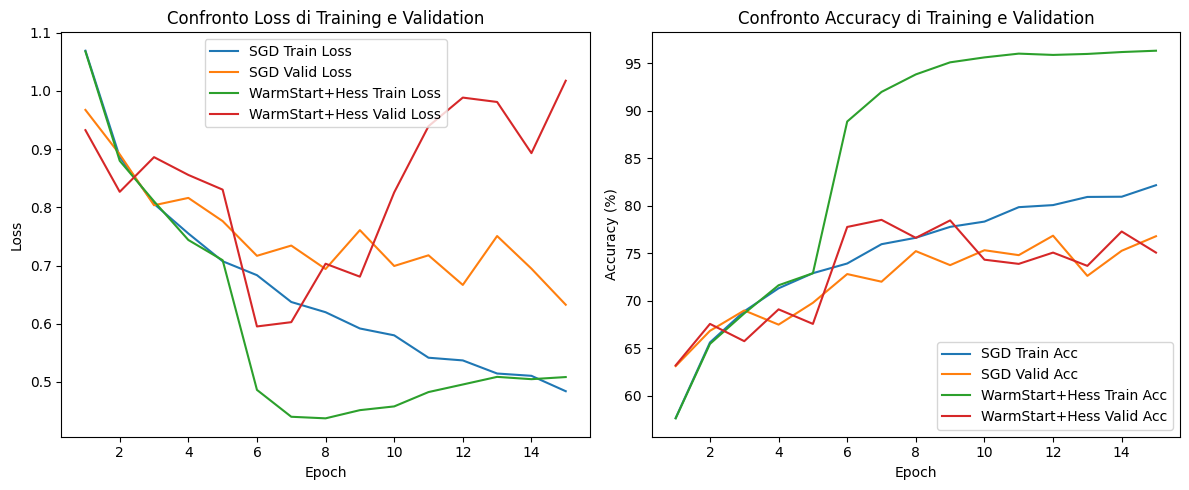


Suggerimenti di miglioramento per l'approccio Hessiano:
1) Prova ad aumentare ulteriormente il warm start (es. 8-10 epoche).
2) Riduci lr_hessian (es. 1e-5) o aumenta il damping (es. 1e-2) se il training Hessiano risulta instabile.
3) Valuta batch size più grandi per stime del gradiente più stabili.
4) Considera metodi quasi-newton (LBFGS) se vuoi un approccio di 2° ordine più robusto.


In [ ]:


import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from tqdm import tqdm



device = torch.device("mps" if torch.backends.mps.is_available() 
                      else "cuda" if torch.cuda.is_available() 
                      else "cpu")
print("Using device:", device)


total_epochs = 15         # Numero di epoche totali (warm start + Hessiano)
warm_start_epochs = 5     # Epoche di warm start con SGD
batch_size = 32           # Batch size (più grande => stima gradiente più stabile)
damping = 1e-3            # Damping più elevato per stabilizzare l'aggiornamento Hessiano
lr_hessian = 1e-4         # Fattore di scala per l'aggiornamento Hessiano (ridotto)
learning_rate_sgd = 0.01  # Learning rate per SGD
momentum_sgd = 0.9
weight_decay_sgd = 0.001


transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])




dataset_path = "/Users/emanuelevalore/Desktop/Analisi_Numerica/archive/Garbage classification/Garbage classification"
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

num_classes = len(dataset.classes)
train_size = int(0.7 * len(dataset))
valid_size = int(0.1 * len(dataset))
test_size  = len(dataset) - train_size - valid_size

train_dataset, valid_dataset, test_dataset = random_split(
    dataset, [train_size, valid_size, test_size]
)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False)



class MLP(nn.Module):
    def __init__(self, num_classes):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 128 * 3, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, num_classes)
        )
    
    def forward(self, x):
        return self.model(x)



def validate_model(model, data_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    avg_loss = running_loss / len(data_loader)
    accuracy = 100.0 * correct / total
    return avg_loss, accuracy



def train_with_sgd(model, optimizer, criterion, train_loader, valid_loader, device, epochs=10):
    model.to(device)
    train_losses, train_accuracies = [], []
    valid_losses, valid_accuracies = [], []
    
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        progress_bar = tqdm(train_loader, desc=f'SGD Epoch {epoch+1}/{epochs}', leave=False)
        for images, labels in progress_bar:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        train_loss = running_loss / len(train_loader)
        train_acc = 100.0 * correct / total
        valid_loss, valid_acc = validate_model(model, valid_loader, criterion, device)
        
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)
        valid_losses.append(valid_loss)
        valid_accuracies.append(valid_acc)
        
        print(f"SGD Epoch {epoch+1}/{epochs} - "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, "
              f"Valid Loss: {valid_loss:.4f}, Valid Acc: {valid_acc:.2f}%")
    
    return train_losses, train_accuracies, valid_losses, valid_accuracies



def hessian_step_approx(model, criterion, images, labels, damping=1e-4, lr_hessian=1e-3):
    """
    Calcola il gradiente e approssima la diagonale dell'Hessiano come |grad| + damping.
    L'aggiornamento è: param = param - lr_hessian * (grad / (|grad| + damping)).
    """
    loss = criterion(model(images), labels)
    grads = torch.autograd.grad(loss, model.parameters(), create_graph=True)
    
    with torch.no_grad():
        for param, grad in zip(model.parameters(), grads):
            grad_flat = grad.view(-1)
            diag_hessian_approx = torch.abs(grad_flat) + damping
            update = lr_hessian * (grad_flat / diag_hessian_approx).view(param.shape)
            param.sub_(update)
    return loss.item()

def train_with_hessian(model, criterion, train_loader, valid_loader, device, epochs=10, 
                       damping=1e-4, lr_hessian=1e-3):
    model.to(device)
    train_losses, train_accuracies = [], []
    valid_losses, valid_accuracies = [], []
    
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        progress_bar = tqdm(train_loader, desc=f'Hessian Epoch {epoch+1}/{epochs}', leave=False)
        for images, labels in progress_bar:
            images, labels = images.to(device), labels.to(device)
            
            try:
                loss_val = hessian_step_approx(model, criterion, images, labels, damping, lr_hessian)
            except RuntimeError as e:
                print("Aggiornamento Hessiano saltato per instabilità:", e)
                continue
            
            running_loss += loss_val
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        train_loss = running_loss / len(train_loader)
        train_acc = 100.0 * correct / total
        valid_loss, valid_acc = validate_model(model, valid_loader, criterion, device)
        
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)
        valid_losses.append(valid_loss)
        valid_accuracies.append(valid_acc)
        
        print(f"Hessian Epoch {epoch+1}/{epochs} - "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, "
              f"Valid Loss: {valid_loss:.4f}, Valid Acc: {valid_acc:.2f}%")
    
    return train_losses, train_accuracies, valid_losses, valid_accuracies


def train_with_hessian_warm_start(model, criterion, train_loader, valid_loader, device,
                                  total_epochs=10, warm_start_epochs=5,
                                  damping=1e-4, lr_hessian=1e-3,
                                  lr_sgd=0.01, momentum_sgd=0.9, weight_decay_sgd=0.001):
    """
    Esegue prima un warm start con SGD per `warm_start_epochs`,
    poi passa al training hessiano per (total_epochs - warm_start_epochs).
    """

    print(f"\n=== Warm Start con SGD per {warm_start_epochs} epoche ===")
    optimizer = optim.SGD(model.parameters(), lr=lr_sgd, momentum=momentum_sgd, weight_decay=weight_decay_sgd)
    sgd_train_losses, sgd_train_acc, sgd_valid_losses, sgd_valid_acc = train_with_sgd(
        model, optimizer, criterion, train_loader, valid_loader, device, epochs=warm_start_epochs
    )
    

    remaining_epochs = total_epochs - warm_start_epochs
    print(f"\n=== Training con Metodo Hessiano per {remaining_epochs} epoche ===")
    hessian_train_losses, hessian_train_acc, hessian_valid_losses, hessian_valid_acc = train_with_hessian(
        model, criterion, train_loader, valid_loader, device, 
        epochs=remaining_epochs, damping=damping, lr_hessian=lr_hessian
    )
    

    train_losses = sgd_train_losses + hessian_train_losses
    train_accuracies = sgd_train_acc + hessian_train_acc
    valid_losses = sgd_valid_losses + hessian_valid_losses
    valid_accuracies = sgd_valid_acc + hessian_valid_acc
    
    return train_losses, train_accuracies, valid_losses, valid_accuracies



if __name__ == "__main__":
    criterion = nn.CrossEntropyLoss()
    
    # Training con SGD puro
    print("\n=== Training con SGD (puro) ===")
    model_sgd = MLP(num_classes).to(device)
    optimizer_sgd = optim.SGD(model_sgd.parameters(), 
                              lr=learning_rate_sgd, 
                              momentum=momentum_sgd, 
                              weight_decay=weight_decay_sgd)
    
    sgd_train_losses, sgd_train_acc, sgd_valid_losses, sgd_valid_acc = train_with_sgd(
        model_sgd, optimizer_sgd, criterion, 
        train_loader, valid_loader, device, 
        epochs=total_epochs
    )
    
    
    print("\n=== Training con Warm Start (SGD) + Hessiano ===")
    model_hessian = MLP(num_classes).to(device)
    hs_train_losses, hs_train_acc, hs_valid_losses, hs_valid_acc = train_with_hessian_warm_start(
        model_hessian, criterion, 
        train_loader, valid_loader, device,
        total_epochs=total_epochs, 
        warm_start_epochs=warm_start_epochs,
        damping=damping, 
        lr_hessian=lr_hessian,
        lr_sgd=learning_rate_sgd, 
        momentum_sgd=momentum_sgd, 
        weight_decay_sgd=weight_decay_sgd
    )
    
    

    epochs_range = range(1, total_epochs + 1)
    
    plt.figure(figsize=(12, 5))
    
    # Grafico delle Loss (training e validation)
    plt.subplot(1,2,1)
    plt.plot(epochs_range, sgd_train_losses, label="SGD Train Loss")
    plt.plot(epochs_range, sgd_valid_losses, label="SGD Valid Loss")
    plt.plot(epochs_range, hs_train_losses, label="WarmStart+Hess Train Loss")
    plt.plot(epochs_range, hs_valid_losses, label="WarmStart+Hess Valid Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Confronto Loss di Training e Validation")
    plt.legend()
    
    # Grafico delle Accuracy (training e validation)
    plt.subplot(1,2,2)
    plt.plot(epochs_range, sgd_train_acc, label="SGD Train Acc")
    plt.plot(epochs_range, sgd_valid_acc, label="SGD Valid Acc")
    plt.plot(epochs_range, hs_train_acc, label="WarmStart+Hess Train Acc")
    plt.plot(epochs_range, hs_valid_acc, label="WarmStart+Hess Valid Acc")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy (%)")
    plt.title("Confronto Accuracy di Training e Validation")
    plt.legend()
    
    plt.tight_layout()
    plt.show()

## Domande Al prof 

1. Quando riavvio il jupyter percio' rieseguo le celle, i risultati essendo un algoritmo iterativo cambiano ovviamente, sono riportate delle tabelle con dei risultati che sono stati ricavati dall'esecuzione del codice (le lascio lo stesso? Alla fine sono risultati veritieri che dipendo sempre dal punto in cui parte la ricerca del minimo)

2. Nei risultati del modello di machine learning i risultati con l'hessiano sono peggiori e questo è dovuto a principalemnte due motivazioni
- UNO: l'Hessiano converge quando parte da un punto vicino al minimo senno si puo allontanare dal minimo della funzione convergendo in un minimo locale 
- DUE: Ha altre idee che preferisce applicare anzichè il modello di ML ? che dipende molto dal dataset e iperparametri 

3. I risultati per essere veriteri al 100% devono essere valutati su un modello molto piu "PROFONDO" ma questo comporta un allenamento molto piu importante che richiede uno sforzo computazionale maggiore!

4. Vuole anche una spiegazione del Modello di ML utilizzato oppure è troppo fuori dagli argomenti del corso?